STEP 1: Setup

In [1]:
# Adding all the initial import of module
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import sys
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Creating file for saving plot figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Assigment3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

STEP 2: Get the Data

In [3]:
# Downloading and exracting dataset using zipfile and urllib module 

from zipfile import ZipFile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/vigneshwaran-ravichandran/RIT-DSCI-633-FDS/main"

TITANIC_PATH = os.path.join("datasets", "titanic")
TITANIC_URL = DOWNLOAD_ROOT + "/Assignments/titanic.zip"


def fetch_titanic_data(TITANIC_url=TITANIC_URL, TITANIC_path=TITANIC_PATH):
    if not os.path.isdir(TITANIC_path):
        os.makedirs(TITANIC_path)
    tgz_path = os.path.join(TITANIC_path, "titanic.zip")
    urllib.request.urlretrieve(TITANIC_url, tgz_path)
    with ZipFile(tgz_path, 'r') as zipObj:
      zipObj.extractall(TITANIC_PATH)

In [4]:
fetch_titanic_data()

STEP 3: Data Manpulation and Analysis using Pandas framework

In [5]:
# Creating local variable for the respective file path
datapath4GenderSubmission = os.path.join("/content/datasets/titanic/gender_submission.csv")
datapath4Train = os.path.join("/content/datasets/titanic/train.csv")
datapath4Test = os.path.join("/content/datasets/titanic/test.csv")


In [6]:
# Converting CSV into Pandas framework
genderSubmissionCSV = pd.read_csv(datapath4GenderSubmission)
TrainDataCSV = pd.read_csv(datapath4Train)
TestDataCSV = pd.read_csv(datapath4Test)

In [7]:
# Viewing first 5 instances of the Gender submission csv
genderSubmissionCSV.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
# Counting rows and columns of the Gender submission csv

genderSubmissionCSV.shape

(418, 2)

In [9]:
# Viewing first 5 instances of the Train csv

TrainDataCSV.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Counting rows and columns of the Train csv

TrainDataCSV.shape

(891, 12)

In [11]:
# Viewing first 5 instances of the Test csv

TestDataCSV.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Counting rows and columns of the Test csv

TestDataCSV.shape

(418, 11)

In [13]:
# Describing for the Train datasets

TrainDataCSV.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Saving figure Titanic_histogram_plots


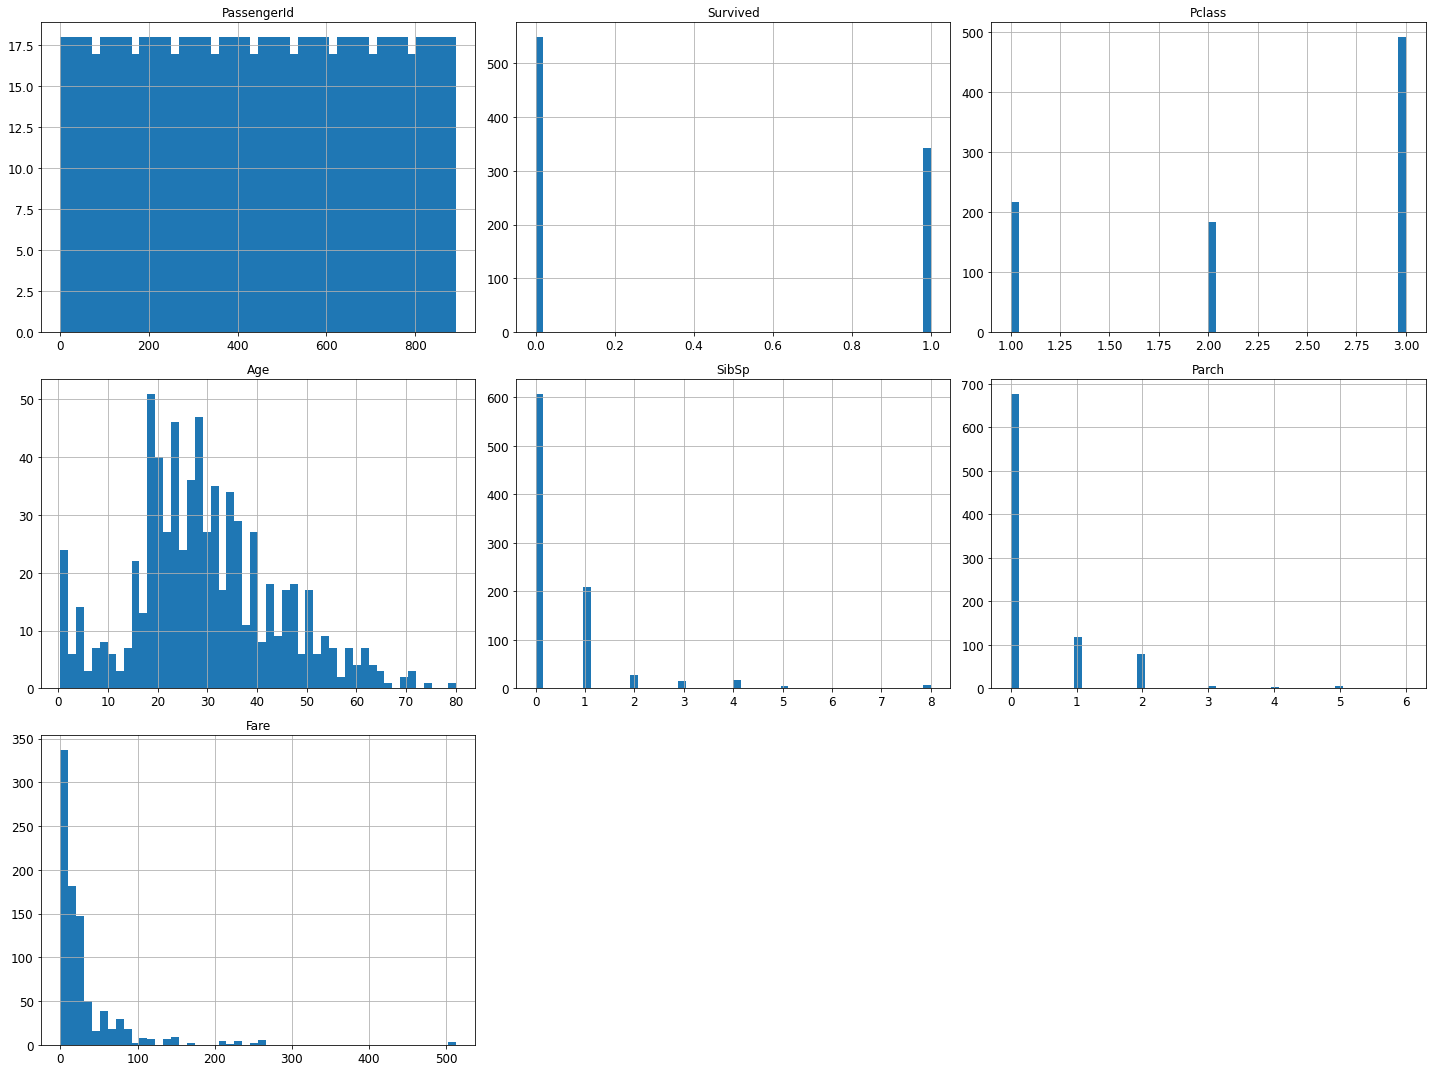

In [14]:
# Plotting histogram plot for the Train datasets

TrainDataCSV.hist(bins=50, figsize=(20,15))
save_fig("Titanic_histogram_plots")
plt.show()

STEP 4: Discover and visualize the data to gain insights

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000



Saving figure visualization_plot


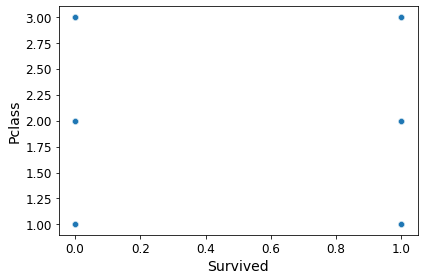

In [15]:
# Visualize the data for Survived and PClass
distributionInit = pd.DataFrame(TrainDataCSV,columns=['Survived',	'Pclass'])
X = TrainDataCSV["Survived"]
y = TrainDataCSV["Pclass"]
correlationMatrix = distributionInit.corr()
display(correlationMatrix)
print("")
sns.scatterplot(x=X,y=y)
save_fig("visualization_plot")

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000



Saving figure visualization_plot


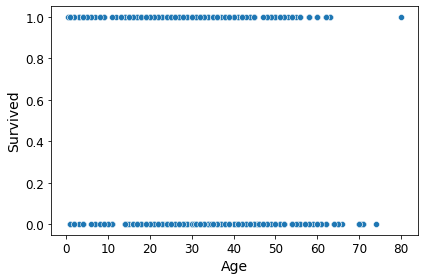

In [16]:
# Visualize the data for Survived and Age
distributionInit = pd.DataFrame(TrainDataCSV,columns=['Survived',	'Pclass'])
y = TrainDataCSV["Survived"]
X = TrainDataCSV["Age"]
correlationMatrix = distributionInit.corr()
display(correlationMatrix)
print("")
sns.scatterplot(x=X,y=y)
save_fig("visualization_plot")

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000



Saving figure visualization_plot


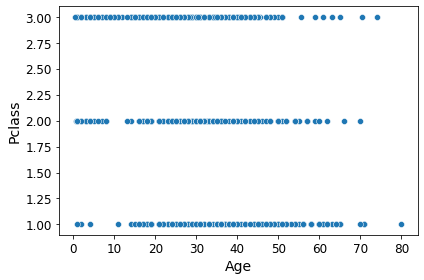

In [17]:
# Visualize the data for Pclass and Age
distributionInit = pd.DataFrame(TrainDataCSV,columns=['Survived',	'Pclass'])
X = TrainDataCSV["Age"]
y = TrainDataCSV["Pclass"]
correlationMatrix = distributionInit.corr()
display(correlationMatrix)
print("")
sns.scatterplot(x=X,y=y)
save_fig("visualization_plot")

In [18]:
# Showing dataset data type

TrainDataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


STEP 5: Prepare the data for Machine Learning algorithms

In [19]:
# Cleaning Train data

from sklearn.preprocessing import LabelEncoder
embarkedLabelEncode=TrainDataCSV.iloc[:,-1].tolist()
genderLabelEncode=TrainDataCSV.iloc[:,-8].tolist()

gender_encoder = LabelEncoder()
TrainDataCSV["Embarked"] = gender_encoder.fit_transform(embarkedLabelEncode)
TrainDataCSV["Sex"] = gender_encoder.fit_transform(genderLabelEncode)


y_train = TrainDataCSV["Survived"];
TrainDataCSV.drop('Survived', inplace=True, axis=1)
TrainDataCSV.drop('Name', inplace=True, axis=1)
TrainDataCSV.drop('Ticket', inplace=True, axis=1)
TrainDataCSV.drop('Cabin', inplace=True, axis=1)
TrainDataCSV.drop('PassengerId', inplace=True, axis=1)
TrainDataCSV.drop('Embarked', inplace=True, axis=1)
TrainDataCSV.drop('Pclass', inplace=True, axis=1)

TrainDataCSV['Age'].fillna(value=TrainDataCSV['Age'].mean(), inplace=True)


X_train = np.c_[TrainDataCSV];
print(X_train.shape)
print(y_train.shape)



(891, 5)
(891,)


In [20]:
TrainDataCSV.head()

,Sex,Age,SibSp,Parch,Fare
0,1,22.0,1,0,7.2500
1,0,38.0,1,0,71.2833
2,0,26.0,0,0,7.9250
3,0,35.0,1,0,53.1000
4,1,35.0,0,0,8.0500


In [21]:
TrainDataCSV.isnull().sum()

Sex      0
Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

In [22]:
TestDataCSV.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
#Cleaning Test data

embarkedLabelEncode=TestDataCSV.iloc[:,-1].tolist()
genderLabelEncode=TestDataCSV.iloc[:,-5].tolist()

TestDataCSV["Embarked"] = gender_encoder.fit_transform(embarkedLabelEncode)
TestDataCSV["Sex"] = gender_encoder.fit_transform(genderLabelEncode)
TestDataCSV['Age'].fillna(value=TestDataCSV['Age'].mean(), inplace=True)
TestDataCSV['Fare'].fillna(value=TestDataCSV['Fare'].mean(), inplace=True)
# 'PassengerId','Ticket','Cabin', 'Name'
#TestDataCSV.drop('Age', inplace=True, axis=1)
TestDataCSV.drop('Name', inplace=True, axis=1)
TestDataCSV.drop('Ticket', inplace=True, axis=1)
TestDataCSV.drop('Embarked', inplace=True, axis=1)
TestDataCSV.drop('Pclass', inplace=True, axis=1)
TestDataCSV.drop('Cabin', inplace=True, axis=1)
TestDataCSV.drop('PassengerId', inplace=True, axis=1)

STEP 6: Select and train a model

In [24]:
# Training data on SVC with default hyperparameters

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred=svc.predict(TestDataCSV)

In [26]:
print(metrics.accuracy_score(genderSubmissionCSV['Survived'],y_pred))

0.645933014354067


In [27]:
# Training data on Ada Boost classifier with default hyperparameters

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(TestDataCSV)

metrics.accuracy_score(genderSubmissionCSV['Survived'],pred)

0.3660287081339713

In [28]:
# Training data on SGD Classifier with default hyperparameters

from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
# fit (train) the classifier
sgdc.fit(X_train, y_train)

pred2 = sgdc.predict(TestDataCSV)

metrics.accuracy_score(genderSubmissionCSV['Survived'],pred2)


0.35167464114832536

STEP 7: Fine-tune your model

In [29]:
# Training data on SVC with Tuned hyperparameters

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


svc=SVC(kernel = "poly",C=0.1,degree=3) #Default hyperparameters
svc.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred=svc.predict(TestDataCSV)

In [31]:
print(metrics.accuracy_score(genderSubmissionCSV['Survived'],y_pred))

0.6602870813397129
